# IS-537 Final Project

# Netflix Data

### Kinjal Shah (kshah221), Dishay Shah (dpshah3)

### The well-known streaming provider Netflix has a vast selection of films, TV programs, and original programming. The original dataset, can be accessed https://www.kaggle.com/datasets/shivamb/netflix-shows. The information consists of materials that Netflix added between 2008 and 2021. The earliest content dates back to 1925, and the most recent is from 2021. Python (pandas) will be used to clean up this dataset. This dataset was created to evaluate our data cleaning and tidying abilities.

### About this Dataset: 
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Understanding the dataset
There is a single dataset that is being used, the netflix1.csv. This file was obtained from Kaggle and it is an already cleaned version of another file.

This data set consist on contents added to Netflix from 2008 to 2021. The variables of this data set are:

    -show_id: Netflix ID of the media.
    -Type: Movie or TV Show.
    -title: Title of the media.
    -director: Director of the media.
    -country: Country in which the movie was made.
    -date_added: Date in which the media was added.
    -release_year: Year in which the media was released.
    -rating: Age rating of the media.
    -duration: Duration of the media.
    -listen_in: Classification given by Netflix.

In [1]:
# importing all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the csv file using pandas

df = pd.read_csv("netflix1.csv")

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# studying the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
#clenaing

#good practice is to make a copy of the data before cleaning

df_clean = df.copy()

In [6]:
#'date_added' variable has wrong data type

#The variable 'date_added' has been categorised as an object (string), 
#the most appropriate type of data for this variable would be datetime.

df_clean.date_added = pd.to_datetime(df_clean.date_added)

In [7]:
#checking the datatype again

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [8]:
#The 'listed_in' variable can have several categories per media, 
#we would like to create new variables to be able to extract this and correctly filter the data. 

df_clean['listed_in1'] = 0
df_clean['listed_in2'] = 0
df_clean['listed_in3'] = 0
temp_cat = df_clean.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = 0
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 2:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 3:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = temp_cat[i][2]


/var/folders/k9/hk58_x1s7t9204yb8jpr51gh0000gn/T/ipykernel_87434/1205126150.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in1'][i] = temp_cat[i][0]
/var/folders/k9/hk58_x1s7t9204yb8jpr51gh0000gn/T/ipykernel_87434/1205126150.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in2'][i] = 0
/var/folders/k9/hk58_x1s7t9204yb8jpr51gh0000gn/T/ipykernel_87434/1205126150.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [9]:
df_clean

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0


In [10]:
#There are two different types of observations in a single data set: 
#TV Shows and Movies. The solution would be to split the dataset into two.

df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']


In [11]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries


In [12]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals


In [13]:
#Variable 'duration' has the wrong data type
#Whilst movies and TV shows were combined into a single dataframe, 
#it was not possible to easily compare the length of these medias. 
#However, now that they are separated each of these variables are not require to be kept as an object; 
#but instead they should be integers.

temp_dur = df_tv.duration.str.split(' ',expand=True)
df_tv['duration_seasons'] = temp_dur[0]
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)

/var/folders/k9/hk58_x1s7t9204yb8jpr51gh0000gn/T/ipykernel_87434/4197091461.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons'] = temp_dur[0]
/var/folders/k9/hk58_x1s7t9204yb8jpr51gh0000gn/T/ipykernel_87434/4197091461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)


In [14]:
temp_dur = df_movie.duration.str.split(' ',expand=True)
df_movie['duration_minutes'] = temp_dur[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)

/var/folders/k9/hk58_x1s7t9204yb8jpr51gh0000gn/T/ipykernel_87434/3991584291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = temp_dur[0]
/var/folders/k9/hk58_x1s7t9204yb8jpr51gh0000gn/T/ipykernel_87434/3991584291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)


In [15]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries,1


In [16]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,125
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0,104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals,87


In [17]:
#exporting clean data as csv


df_clean.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

## Analysing

### The main purpose of taking such a dataset for cleaning and analysing, is because we wanted to validate the drop in movies and show's TRP/streaming impact due to pandemic.

### As we will see further, number of shows and movies released per year was going good(positively increasing)  after 2018 until 2020  but then we see a significant drop in the release count in years 2020-2021 explaining the effects of pandemic on the showbiz

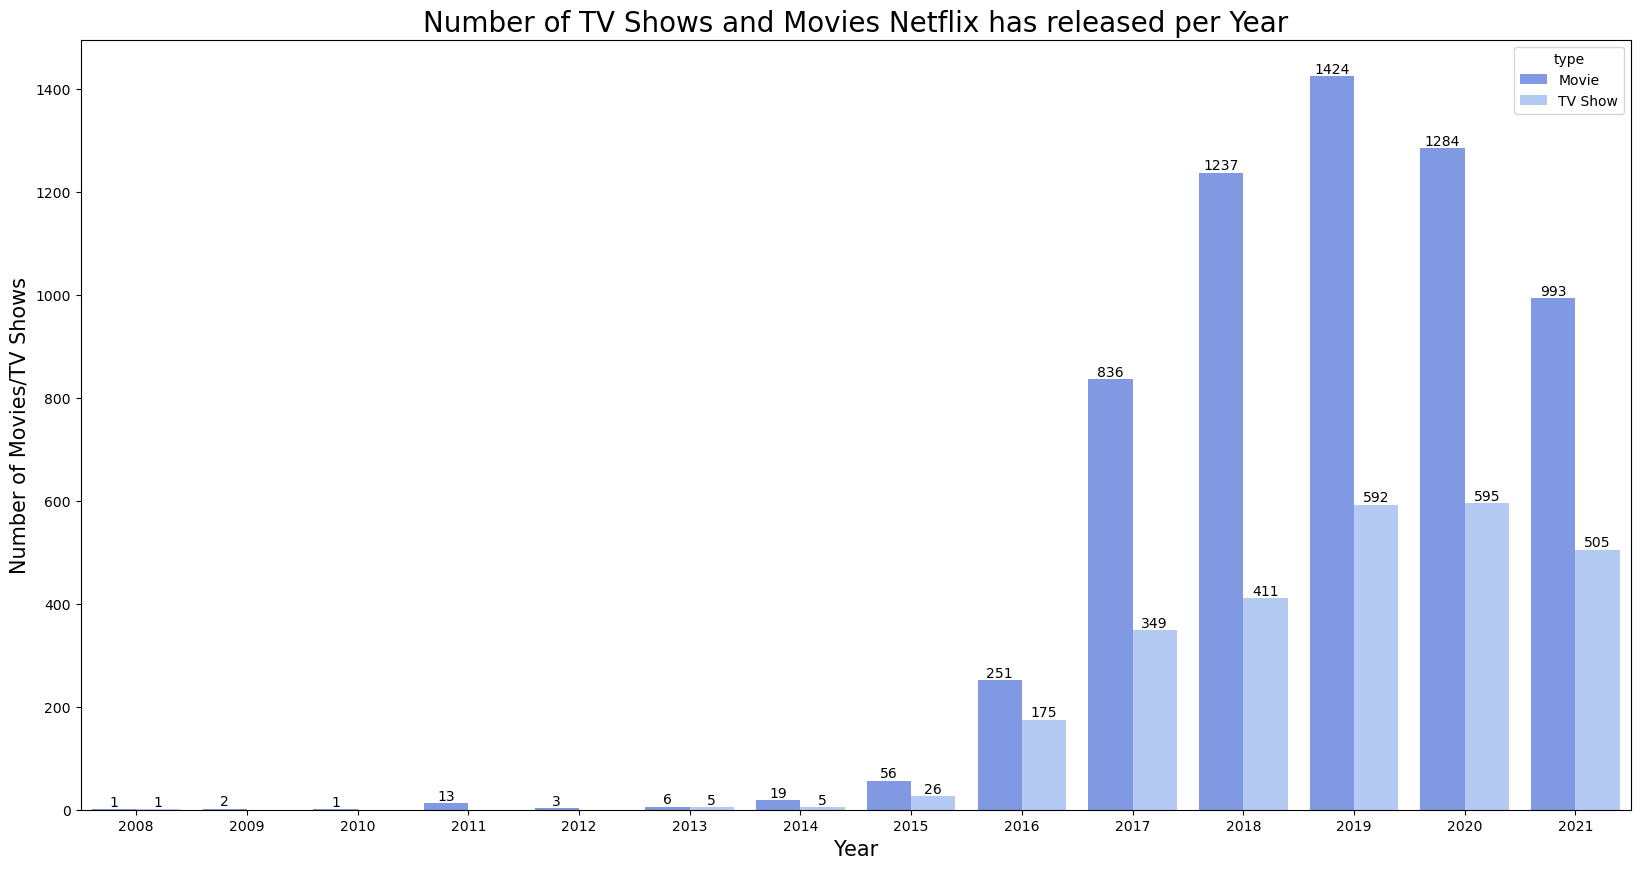

In [18]:
#basic analysing 

# Considering there are too many countries, we will only analyze top 10 countries.

plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)
for container in tv_movie.containers:
    tv_movie.bar_label(container)